Shreyas Vaderiyattil, Ritvik Singh, Shiv Rathod

Introduction

Formula One is an international racing league that gathers the top drivers from around the world and they compete against each other using one of the fastest cars built for racing on circuits around the world. In this tutorial we will be analyizing the lap times of various drivers as well as their pit stop times. In addition, we will take a look at these timings and compare it to their qualified place for the race and see if a driver would place above or below their qualified time.

Predicting what place a driver can place is important to not only the racing team and driver but also fans that follow the sport. Racing teams and drivers find this useful for their approach and strategy for the race. This can help with fast decisions that are needed during a race between the driver and the team.


Processing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime
import seaborn as sns


In [2]:
circuit_data = pd.read_csv('circuits.csv')
driver_data = pd.read_csv('drivers.csv')
lap_data = pd.read_csv('lap_times.csv')
pit_data = pd.read_csv('pit_stops.csv')
quali_data = pd.read_csv('qualifying.csv')
race_data = pd.read_csv('races.csv')
result_data = pd.read_csv('results.csv')


In [3]:
circuit_data.head()


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


We have circuit data to extract the circuitId needed for analysis. 
In this dataset we have data for what type of circuit, location, and its longitude and latitude.

In [4]:
driver_data.head()


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


We have driver data to extract the drivers that have raced on the circuits that we are analyzing. 
Driver data outputs the driver, their number, name, DOB, and nationality.

In [5]:
lap_data.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


We have extracted lap_data for analysis on lap times per driver for each race. This dataset outputs which lap, what position, and the time.

In [6]:
pit_data.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


We have extracted pit stop data for analysis on how this timing can affect what positon a driver finishes in. This dataset provides which lap the driver pitted in and how long the pit stop was.

In [7]:
quali_data.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


Qualifying data provides times as well as the position the driver starts in at the end of qualifiying. Q1, Q2, Q3 are provided as well as the race and driver id.

In [8]:
race_data.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


The race dataset provides a given race as well as the circuit that given race happened as well as the date for analysis. 

In [9]:
result_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


Lastly, we have the results dataset. This dataset provides the race, drive id as well as their starting and ending position. This dataset will help with training our data for later machine learning analysis on starting and ending positons. 

Our first task is to have all of our datasets be filtered between 2016-2021.
We first want to filter the data for all the datasets to contain races between the years 2016-2021 for our analysis. We then want to extract all the circuits that were raced on between this time frame.
This process is repeated for the rest of the datasets.

In [10]:
# Retrieve all races that are between 2016 and 2021
new_race_data = race_data[(race_data['year'] >= 2016)]

# Extract the circuits that were raced on in this time frame
unique_circuits = race_data['circuitId'].unique()
new_circuit_data = circuit_data[np.isin(circuit_data['circuitId'], unique_circuits)]

# Extract the results of the races between the time frame
new_result_data = result_data[np.isin(result_data, new_race_data['raceId'])]

# Extract the drivers that raced in this time frame
new_driver_data = driver_data[np.isin(driver_data, new_result_data['driverId'])]

# Extract lap_times for each race in this time frame
new_lap_data = lap_data[np.isin(lap_data, new_race_data['raceId'])]

# Extract pit data for each race in this time frame
new_pit_data = pit_data[np.isin(pit_data, new_race_data['raceId'])]

# Extract quailifying time data from each race in this time frame
new_quali_data = quali_data[np.isin(quali_data, new_race_data['raceId'])]

Now that we have filtered each dataset to fit our current time frame we can now visualize the datasets. We will first look into visualizing a drivers average pit stop time per race and the difference between their starting and ending position.
We will be analyzing 3 drivers during 3 different time periods and see average pit stop time vs. difference in position.

In [11]:
new_driver_data

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
10,11,sato,\N,SAT,Takuma,Sato,1977-01-28,Japanese,http://en.wikipedia.org/wiki/Takuma_Sato
12,13,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
13,14,coulthard,\N,COU,David,Coulthard,1971-03-27,British,http://en.wikipedia.org/wiki/David_Coulthard
14,15,trulli,\N,TRU,Jarno,Trulli,1974-07-13,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli


In [12]:
def getDriverPitTimes(driverId, year):
    driver_races = new_race_data[(new_race_data['year'] == year)]
    # Extract pit times of the driver
    driver_pit_times = pit_data[(pit_data['driverId'] == driverId)]
    # Filter the pit times with times that are only in the given year
    driver_pit_times = driver_pit_times[np.isin(driver_pit_times, driver_races['raceId'])]

    # Convert time in milliseconds to seconds and place in new column
    driver_pit_times['new_time'] = driver_pit_times['milliseconds'].astype(float) / 1000
    # Find the mean per raceId of the pit stop times 
    driver_pit_times = driver_pit_times.groupby('raceId', as_index=False)['new_time'].mean()
    return driver_pit_times

In [13]:
def getDriverDifferences(driverId, year, driverPitTimes):
    # Now we must find the difference in positions of each race in the given year for the driver
    difference = []
    # Create a temp that will filter out all the race Ids
    temp = new_result_data[np.isin(new_result_data, driverPitTimes['raceId'])]
    # Make a new dataframe that will have all the races for Driver
    driver_difference = temp[(temp['driverId'] == driverId)]
    
    driver_difference = driver_difference[['raceId','grid','position']]

    for index, row in driver_difference.iterrows():
        if row['position'] == '\\N':
            index2 = driverPitTimes[driverPitTimes.raceId == row['raceId']].index
            driverPitTimes.drop(index2, inplace = True)
            driver_difference.drop(index, inplace = True)
            
    # Create a new column which shows the difference in starting and ending position
    driver_difference['difference'] = driver_difference['grid'].astype(float) - driver_difference['position'].astype(float)

    new_index = list(range(0, len(driverPitTimes)))
    driver_difference.index = new_index

    # Statistically remove outliers for better data visualization using IQR test
    for time in driverPitTimes['new_time']:
        Q1 = driverPitTimes.quantile(0.01)
        Q3 = driverPitTimes.quantile(0.8)
        IQR = Q3.new_time - Q1.new_time

        if time > (Q3.new_time + 1.5 * IQR):
            # Drop row if the time is an outlier
            index = driverPitTimes[driverPitTimes.new_time == time].index
            driverPitTimes.drop(index, inplace=True)
            driver_difference.drop(index, inplace=True)
    return driver_difference


In [17]:
# We will sample drivers that are known to race almost every race for better analysis driverId = 1,8,20
# Lewis Hamilton is driverId = 1 and we will analyze his 2016 pit stop times

# Calling the function to get the pit times for Lewis Hamilton (DriverId: 1) in 2016
hamilton_pit_times = getDriverPitTimes(1,2016)
# Calling the function to get the differences for Lewis Hamilton (DriverId: 1) in 2016
hamilton_difference = getDriverDifferences(1,2016,hamilton_pit_times)

hamilton_pit_times.head()

,raceId,new_time
1,949,24.688667
2,950,24.425200
3,951,30.001000
4,953,26.315000
5,954,22.243000


In [18]:
hamilton_difference.head()

,raceId,grid,position,difference
1,949,1,3,-2.0
2,950,22,7,15.0
3,951,10,2,8.0
4,953,3,1,2.0
5,954,1,1,0.0


After tidying up the data for Lewis Hamilton Pit stop times in 2016 as well as position differences we can now plot on a scatter plot Pit Stop Time in Seconds vs. Starting and Ending position difference. This will allow us to see if there is more positive difference in position when his pit stop time is smaller and a more negative difference if his pit stop time is larger.

Text(0, 0.5, 'Ending Position - Starting Position')

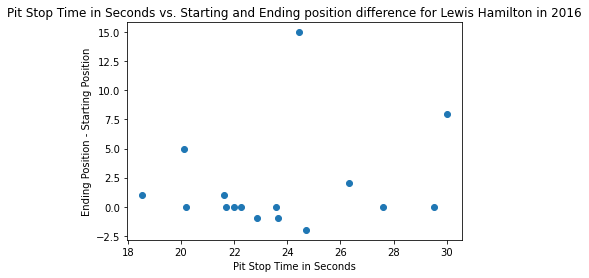

In [19]:
plt.scatter(hamilton_pit_times['new_time'], hamilton_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Lewis Hamilton in 2016")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [ ]:
# We will now repeat the process for Lewis Hamilton is driverId = 1 and we will analyze his 2018 pit stop times

# Calling the function to get the pit times for Lewis Hamilton (DriverId: 1) in 2018
hamilton_pit_times = getDriverPitTimes(1,2018)
# Calling the function to get the differences for Lewis Hamilton (DriverId: 1) in 2018
hamilton_differrence = getDriverDifferences(1,2018,hamilton_pit_times)

hamilton_pit_times.head()

In [ ]:
hamilton_differrence.head()

In [ ]:
plt.scatter(hamilton_pit_times['new_time'], hamilton_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Lewis Hamilton in 2018")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [ ]:
# We will now repeat the process for Lewis Hamilton is driverId = 1 and we will analyze his 2020 pit stop times

# Calling the function to get the pit times for Lewis Hamilton (DriverId: 1) in 2018
hamilton_pit_times = getDriverPitTimes(1,2020)
# Calling the function to get the differences for Lewis Hamilton (DriverId: 1) in 2018
hamilton_differrence = getDriverDifferences(1,2020,hamilton_pit_times)

hamilton_pit_times.head()

In [ ]:
hamilton_differrence.head()

In [ ]:
plt.scatter(hamilton_pit_times['new_time'], hamilton_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Lewis Hamilton in 2020")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

After graphing a scatter plot for Lewis' pit stop times in 3 different years one thing that we notice is that the majority of the points are between 20 and 25 seconds with minimal position changes. Lewis Hamilton is considered one of the best F1 drivers who qualifies in the top 5 for the most part. Seeing minimal changes in position as well as minimal difference in positions when his pit stop times is higher is to be expected as he is a very skilled driver. There are many factors that can contribute to the performance of a driver other than just the pit stop times. Some interfering factors that may play a part are weather, performance of other drivers, team decision making, tire strategy, fuel strategy, etc.

In [ ]:
# We will sample drivers that are known to race almost every race for better analysis driverId = 1,8,20
# Kimi Raikkonen is driverId = 8 and we will analyze his 2016 pit stop times

# Calling the function to get the pit times for Kimi Raikkonen (DriverId: 8) in 2016
kimi_pit_times = getDriverPitTimes(8,2016)
# Calling the function to get the differences for Kimi Raikkonen (DriverId: 8) in 2016
kimi_difference = getDriverDifferences(8,2016,kimi_pit_times)
kimi_pit_times.head()

In [ ]:
kimi_difference.head()

In [ ]:
plt.scatter(kimi_pit_times['new_time'], kimi_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Kimi Raikkonen in 2016")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [ ]:
# We will repeat the process with Kimi Raikkonen is driverId = 8 and we will analyze his 2018 pit stop times

# Calling the function to get the pit times for Kimi Raikkonen (DriverId: 8) in 2018
kimi_pit_times = getDriverPitTimes(8,2018)
# Calling the function to get the differences for Kimi Raikkonen (DriverId: 8) in 2018
kimi_difference = getDriverDifferences(8,2018,kimi_pit_times)
kimi_pit_times.head()

In [ ]:
kimi_difference.head()

In [ ]:
plt.scatter(kimi_pit_times['new_time'], kimi_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Kimi Raikkonen in 2018")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [ ]:
# We will repeat the process with Kimi Raikkonen is driverId = 8 and we will analyze his 2020 pit stop times

# Calling the function to get the pit times for Kimi Raikkonen (DriverId: 8) in 2020
kimi_pit_times = getDriverPitTimes(8,2020)
# Calling the function to get the differences for Kimi Raikkonen (DriverId: 8) in 2020
kimi_difference = getDriverDifferences(8,2020,kimi_pit_times)
kimi_pit_times.head()

In [ ]:
kimi_difference.head()

In [ ]:
plt.scatter(kimi_pit_times['new_time'], kimi_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Kimi Raikkonen in 2020")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

After plotting Kimi Raikkonen's pit stop data we can see similar to Hamilton's data the majority of his pit stop times is between 20 and 25 seconds. In additon, we can see that as pit stop times increase Kimi either places the same or slightly less than what he started in. However, in 2020 even with good pit stop times there are occasions where Kimi places less than what he started in. It is possible that factors outside of pit stop times can affect what place a driver finishes in.

In [ ]:
# We will sample drivers that are known to race almost every race for better analysis driverId = 1,8,20
# Sebastian Vettel is driverId = 20 and we will analyze his 2016 pit stop times

# Calling the function to get the pit times for Sebastian Vettel (DriverId: 20) in 2016
vettel_pit_times = getDriverPitTimes(20,2016)
# Calling the function to get the differences for Sebastian Vettel (DriverId: 20) in 2016
vettel_difference = getDriverDifferences(20,2016,vettel_pit_times)
vettel_pit_times.head()

In [ ]:
vettel_difference.head()

In [ ]:
plt.scatter(vettel_pit_times['new_time'], vettel_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Sebastian Vettel in 2016")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [ ]:
# We will repeat the process for Sebastian Vettel is driverId = 20 and we will analyze his 2018 pit stop times

# Calling the function to get the pit times for Sebastian Vettel (DriverId: 20) in 2018
vettel_pit_times = getDriverPitTimes(20,2018)
# Calling the function to get the differences for Sebastian Vettel (DriverId: 20) in 2018
vettel_difference = getDriverDifferences(8,2018,vettel_pit_times)
vettel_pit_times.head()

In [ ]:
vettel_difference.head()

In [ ]:
plt.scatter(vettel_pit_times['new_time'], vettel_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Sebastian Vettel in 2018")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

In [ ]:

# We will repeat the process for Sebastian Vettel is driverId = 20 and we will analyze his 2020 pit stop times

# Calling the function to get the pit times for Sebastian Vettel (DriverId: 20) in 2020
vettel_pit_times = getDriverPitTimes(20,2020)
# Calling the function to get the differences for Sebastian Vettel (DriverId: 20) in 2020
vettel_difference = getDriverDifferences(8,2020,vettel_pit_times)
vettel_pit_times.head()



In [ ]:
vettel_difference.head()

In [ ]:
plt.scatter(vettel_pit_times['new_time'], vettel_difference['difference'])
plt.title("Pit Stop Time in Seconds vs. Starting and Ending position difference for Sebastian Vettel in 2020")
plt.xlabel('Pit Stop Time in Seconds')
plt.ylabel('Ending Position - Starting Position')

After plotting Sebastian Vettel's data we can see that the majority of his points are clustered around 0 for the y axis indicating minimal position changes. With higher pit stop times we can also see that he has minimal position changes. This can also indicate external factors such as accidents and lap times can affect a drivers final position.

The correlation between pit stop times and position is minimal based on the scatter plots. We must now take into consideration other factors that can influence a drivers final position such as lap times in a race. If we take the average lap time a driver has in a given race we can assume that a better average lap time in comparison to other drivers would result in a higher placed position. On the contrary we can say a worse average lap time in comparison to others would result in a lower placed position. We will now visualize this data per race in a given year and graph all the drivers average lap time for a given race and see their respective position difference. Spa is a circuit that is well known by fans and is known to be a circuit that is very competitive. We will analyze lap times in different years for this cirucit.

In [ ]:
# We will conduct our first analysis in the year 2016 for Spa and collect all lap times in that given year. 
# Spa is circuit id 13

# Let us first collect all the drivers that raced in Spa in 2016
race_data = new_race_data[(new_race_data['year'] == 2016)]
race_id = race_data[(race_data['circuitId'] == 13)]
race_id = race_id.raceId

drivers = new_result_data[(new_result_data['raceId'] == int(race_id))]
drivers = drivers['driverId']

drivers.view

In [ ]:
new_index = list(range(0, len(drivers)))
drivers.index = new_index

average_lap_data = {}
for driver in drivers:
    temp_lap_data = new_lap_data[(new_lap_data['driverId'] == driver)]
    temp_lap_data = temp_lap_data[(temp_lap_data['raceId'] == int(race_id))]
    average_lap_data[driver] = (temp_lap_data['milliseconds'].mean()) / 1000
    
average_lap_data = pd.DataFrame(average_lap_data.items(), columns=['driverId', 'averageTime'])


In [ ]:
drop_drivers = new_result_data[(new_result_data['raceId'] == int(race_id))]

# Drop rows with drivers that never finished race
for data in drop_drivers.iterrows():
    if data[1]['position'] == '\\N':
        average_lap_data = average_lap_data[average_lap_data.driverId != data[1]['driverId']]

average_lap_data

In [ ]:
driver_differences = []

temp = new_result_data[np.isin(new_result_data, int(race_id))]
difference = temp[(temp['driverId'] == 3)]

for driver in average_lap_data.iterrows():
    temp = new_result_data[np.isin(new_result_data, int(race_id))]
    difference = temp[(temp['driverId'] == driver[1]['driverId'])]
    driver_differences.append(int(difference['grid'].astype(int) - difference['position'].astype(int)))

average_lap_data['positionDiff'] = driver_differences



In [ ]:
plt.scatter(average_lap_data['averageTime'], average_lap_data['positionDiff'])
plt.title("Average Lap Time per Driver vs. Difference from Starting and Ending position in 2016")
plt.xlabel('Average Lap Time per Driver')
plt.ylabel('Ending Position - Starting Position')

In [ ]:
# We will conduct our second analysis in the year 2018 for Spa and collect all lap times in that given year. 
# Spa is circuit id 13

# Let us first collect all the drivers that raced in Spa in 2018
race_data = new_race_data[(new_race_data['year'] == 2018)]
race_id = race_data[(race_data['circuitId'] == 13)]
race_id = race_id.raceId

drivers = new_result_data[(new_result_data['raceId'] == int(race_id))]
drivers = drivers['driverId']

drivers.view

In [ ]:
new_index = list(range(0, len(drivers)))
drivers.index = new_index

average_lap_data = {}
for driver in drivers:
    temp_lap_data = new_lap_data[(new_lap_data['driverId'] == driver)]
    temp_lap_data = temp_lap_data[(temp_lap_data['raceId'] == int(race_id))]
    average_lap_data[driver] = (temp_lap_data['milliseconds'].mean()) / 1000
    
average_lap_data = pd.DataFrame(average_lap_data.items(), columns=['driverId', 'averageTime'])

In [ ]:
drop_drivers = new_result_data[(new_result_data['raceId'] == int(race_id))]

# Drop rows with drivers that never finished race
for data in drop_drivers.iterrows():
    if data[1]['position'] == '\\N':
        average_lap_data = average_lap_data[average_lap_data.driverId != data[1]['driverId']]

average_lap_data

In [ ]:
driver_differences = []

temp = new_result_data[np.isin(new_result_data, int(race_id))]
difference = temp[(temp['driverId'] == 3)]

for driver in average_lap_data.iterrows():
    temp = new_result_data[np.isin(new_result_data, int(race_id))]
    difference = temp[(temp['driverId'] == driver[1]['driverId'])]
    driver_differences.append(int(difference['grid'].astype(int) - difference['position'].astype(int)))

average_lap_data['positionDiff'] = driver_differences

In [ ]:
plt.scatter(average_lap_data['averageTime'], average_lap_data['positionDiff'])
plt.title("Average Lap Time per Driver vs. Difference from Starting and Ending position in 2018")
plt.xlabel('Average Lap Time per Driver')
plt.ylabel('Ending Position - Starting Position')

In [ ]:
# We will conduct our last analysis in the year 2020 for Spa and collect all lap times in that given year. 
# Spa is circuit id 13

# Let us first collect all the drivers that raced in Spa in 2018
race_data = new_race_data[(new_race_data['year'] == 2020)]
race_id = race_data[(race_data['circuitId'] == 13)]
race_id = race_id.raceId

drivers = new_result_data[(new_result_data['raceId'] == int(race_id))]
drivers = drivers['driverId']

drivers.view

In [ ]:
new_index = list(range(0, len(drivers)))
drivers.index = new_index

average_lap_data = {}
for driver in drivers:
    temp_lap_data = new_lap_data[(new_lap_data['driverId'] == driver)]
    temp_lap_data = temp_lap_data[(temp_lap_data['raceId'] == int(race_id))]
    average_lap_data[driver] = (temp_lap_data['milliseconds'].mean()) / 1000
    
average_lap_data = pd.DataFrame(average_lap_data.items(), columns=['driverId', 'averageTime'])

In [ ]:
drop_drivers = new_result_data[(new_result_data['raceId'] == int(race_id))]

# Drop rows with drivers that never finished race
for data in drop_drivers.iterrows():
    if data[1]['position'] == '\\N':
        average_lap_data = average_lap_data[average_lap_data.driverId != data[1]['driverId']]

average_lap_data

In [ ]:
driver_differences = []

temp = new_result_data[np.isin(new_result_data, int(race_id))]
difference = temp[(temp['driverId'] == 3)]

for driver in average_lap_data.iterrows():
    temp = new_result_data[np.isin(new_result_data, int(race_id))]
    difference = temp[(temp['driverId'] == driver[1]['driverId'])]
    driver_differences.append(int(difference['grid'].astype(int) - difference['position'].astype(int)))

average_lap_data['positionDiff'] = driver_differences

In [ ]:
plt.scatter(average_lap_data['averageTime'], average_lap_data['positionDiff'])
plt.title("Average Lap Time per Driver vs. Difference from Starting and Ending position in 2020")
plt.xlabel('Average Lap Time per Driver')
plt.ylabel('Ending Position - Starting Position')